In [1]:
!pip install -U scikit-fuzzy

import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tabulate import tabulate

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f15c397408f649f2970bcb3b36745608198dea4869f4f15111a62101e49dcd58
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
num_terms = 5
X_start = -2
X_end = 2
Y_start = -2
Y_end = 2
Z_start = 0
Z_end = 16

X_step = (abs(X_start) + abs(X_end)) / num_terms
Y_step = (abs(Y_start) + abs(Y_end)) / num_terms
Z_step = (abs(Z_start) + abs(Z_end)) / num_terms
X = np.arange(X_start, X_end + X_step, X_step)
Y = np.arange(Y_start, Y_end + Y_step, Y_step)
Z = np.arange(Z_start, Z_end + Z_step, Z_step)

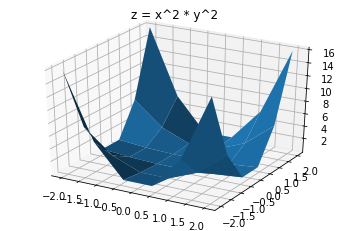

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X2, Y2 = np.meshgrid(X, Y)
Z2 = X2**2 * Y2**2
surf = ax.plot_surface(X2, Y2, Z2,)
plt.title('z = x^2 * y^2')
plt.show()

In [4]:
def rules(start, end, num_terms, label):
  terms = []
  for i in np.arange(num_terms):
    terms.append(i)

  step = (abs(start) + abs(end)) / (num_terms - 1)
  func = ctrl.Antecedent(np.arange(start, end + step, step), label)
  ranges = [None] * num_terms
  for i in np.arange(0, num_terms, 1):
    triangle = []
    if i == 0:
      triangle = [start, start, start + step]
      ranges[i] = {}
      ranges[i]['start'] = triangle[1]
      ranges[i]['end'] = triangle[2] - (step / 2)
      ranges[i]['mid'] = triangle[1]
    else:
      triangle = [
                  (i - 1) * step - abs(start),
                  i * step - abs(start),
                  (i + 1) * step - abs(start)
      ]
      if num_terms - 1 == i:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[1]
        ranges[i]['mid'] = triangle[1]
      else:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[2] - (step / 2)
        ranges[i]['mid'] = triangle[1]
    func[terms[i]] = fuzz.trimf(func.universe, triangle)
  func.view()
  return ranges

ФП для Х:


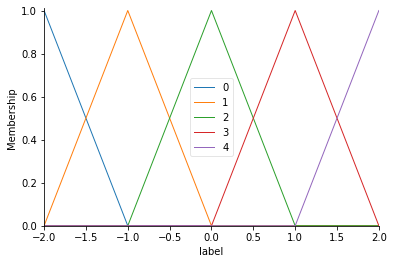

In [5]:
print("ФП для Х:")
ranges_X = rules(X[0], X[-1], num_terms, 'label')

ФП для Y:


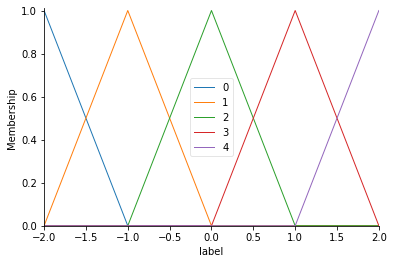

In [6]:
print("ФП для Y:")
ranges_Y = rules(Y[0], Y[-1], num_terms, 'label')

ФП для Z:


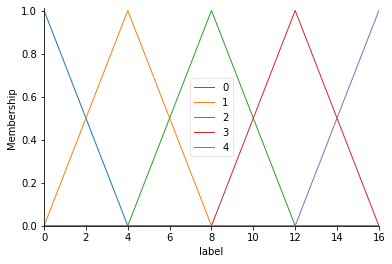

In [7]:
print("ФП для Z:")
ranges_Z = rules(Z[0], Z[-1], num_terms, 'label')

In [8]:
print('Параметры ФП')
fp_params_header = ['№', '1', '2', '3']
fp_params_table = []
for i in range(num_terms):
  print(ranges_X[i])
  fp_params_table.append([i + 1, ranges_X[i]['start'], ranges_X[i]['mid'], ranges_X[i]['end']])

print(tabulate(fp_params_table, fp_params_header))

Параметры ФП
{'start': -2.0, 'end': -1.5, 'mid': -2.0}
{'start': -1.5, 'end': -0.5, 'mid': -1.0}
{'start': -0.5, 'end': 0.5, 'mid': 0.0}
{'start': 0.5, 'end': 1.5, 'mid': 1.0}
{'start': 1.5, 'end': 2.0, 'mid': 2.0}
  №     1    2     3
---  ----  ---  ----
  1  -2     -2  -1.5
  2  -1.5   -1  -0.5
  3  -0.5    0   0.5
  4   0.5    1   1.5
  5   1.5    2   2


In [9]:
def calc_func(x, start, mid, end):
  if start <= x and x <= mid:
    return (x - start) / (mid - start)
  elif mid <= x and x <= end:
    return (x - end)/(mid - end)
  else:
    return 0

In [10]:
number_X = 0
number_Y= 0
number_Z = 0
table = []
header = ['№', 'Параметр 1', 'Параметр 2', 'Значение']
for range_X in ranges_X:
  number_X += 1
  if 'number' not in range_X:
    range_X['number'] = number_X
  for range_Y in ranges_Y:
    number_Y += 1
    if 'number' not in range_Y:
      range_Y['number'] = number_Y
    x = (range_X['start'] + range_X['end']) / 2
    y = (range_Y['start'] + range_Y['end']) / 2
    z = y * math.sin(x+y)
    sum_func_chislitel = 0
    sum_func_znaminatel = 0
    
    for range_Z in ranges_Z:
      if range_Z['start'] <= z and z <= range_Z['end']:
        func_val = calc_func(x, range_X['start'], range_X['mid'], range_X['end'])
        sum_func_chislitel += func_val * z
        sum_func_znaminatel += func_val
        F = sum_func_chislitel / (sum_func_znaminatel + 0.1)
        number_Z += 1
        table.append([number_Z, range_X['number'], range_Y['number'], F])

In [11]:
number_nabl = 0
nabludeniya_headers = ['№', 'X', 'Y', 'Z']
table_nabl = []
for range_X in ranges_X:
  for range_Y in ranges_Y:
    x = (range_X['start'] + range_X['end']) / 2
    y = (range_Y['start'] + range_Y['end']) / 2
    z = y * math.sin(x+y)
    for range_Z in ranges_Z:
      if range_Z['start'] <= z and z <= range_Z['end']:
        number_nabl += 1
        table_nabl.append([number_nabl, x, y, z])

In [12]:
print('Таблица наблюдений')
print(tabulate(table_nabl, nabludeniya_headers))

Таблица наблюдений
  №      X      Y          Z
---  -----  -----  ---------
  1  -1.75  -1      0.381661
  2  -1.75   0     -0
  3  -1.75   1.75   0
  4  -1     -1.75   0.667907
  5  -1     -1      0.909297
  6  -1      0     -0
  7  -1      1      0
  8  -1      1.75   1.19287
  9   0     -1.75   1.72198
 10   0     -1      0.841471
 11   0      0      0
 12   0      1      0.841471
 13   0      1.75   1.72198
 14   1     -1.75   1.19287
 15   1     -1     -0
 16   1      0      0
 17   1      1      0.909297
 18   1      1.75   0.667907
 19   1.75  -1.75  -0
 20   1.75   0      0
 21   1.75   1      0.381661


In [13]:
number_nv = 0
nv_headers = ['№', 'X', 'Y', 'Вывод']
nv_arr = []
for range_X in ranges_X:
  for range_Y in ranges_Y:
    x = (range_X['start'] + range_X['end']) / 2
    y = (range_Y['start'] + range_Y['end']) / 2
    z = y * math.sin(x+y)
    sum_func_chislitel = 0
    sum_func_znaminatel = 0
    for range_Z in ranges_Z:
      if range_Z['start'] <= z and z <= range_Z['end']:
        number_nv += 1
        func_val = calc_func(x, range_X['start'], range_X['mid'], range_X['end'])
        sum_func_chislitel += func_val * z
        sum_func_znaminatel += func_val
        F = sum_func_chislitel / (sum_func_znaminatel + 0.1)
        nv_arr.append([number_nv, x, y, F])

In [14]:
print('Нечеткий вывод')
print(tabulate(nv_arr, nv_headers))

Нечеткий вывод
  №      X      Y     Вывод
---  -----  -----  --------
  1  -1.75  -1     0.318051
  2  -1.75   0     0
  3  -1.75   1.75  0
  4  -1     -1.75  0.607188
  5  -1     -1     0.826634
  6  -1      0     0
  7  -1      1     0
  8  -1      1.75  1.08443
  9   0     -1.75  1.56543
 10   0     -1     0.764974
 11   0      0     0
 12   0      1     0.764974
 13   0      1.75  1.56543
 14   1     -1.75  1.08443
 15   1     -1     0
 16   1      0     0
 17   1      1     0.826634
 18   1      1.75  0.607188
 19   1.75  -1.75  0
 20   1.75   0     0
 21   1.75   1     0.318051


In [15]:
SKO = 0
SAO = 0
MO = 0
sko_sum = 0
sao_sum = 0
max_err = 0
for i in range(len(table_nabl)):
  # считаем сумму СКО:
  sko_sum += np.power((table_nabl[i][3] - nv_arr[i][3]), 2)
  # считаем сумму САО:
  sao_sum += abs(table_nabl[i][3] - nv_arr[i][3])
  # считаем МО:
  mo = abs(table_nabl[i][3] - nv_arr[i][3])
  if mo > max_err:
    MO = mo

sko = math.sqrt(sko_sum/len(table_nabl))
sao = sao_sum/len(table_nabl)
print('СКО: {}'.format(sko))
print('САО: {}'.format(sao))
print('МО: {}'.format(MO))

СКО: 0.07347411031552192
САО: 0.05223575933816446
МО: 0.06361016534205527
